<a href="https://colab.research.google.com/github/DivyaPratapSinghjklu/DATA_ACTION/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
bike_data = pd.read_csv('daily-bike-share.csv')
bike_data.head()

--2023-06-04 17:35:55--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48800 (48K) [text/plain]
Saving to: ‘daily-bike-share.csv’

daily-bike-share.cs 100%[===================>]  47.66K  --.-KB/s    in 0.01s   

2023-06-04 17:35:55 (3.92 MB/s) - ‘daily-bike-share.csv’ saved [48800/48800]



,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


In [2]:
#performing some feature engineering to combine or derive new features.
bike_data['day']=pd.DatetimeIndex(bike_data['dteday']).day
bike_data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,27
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,28
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,29
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,30


In [5]:
#data discription 
bike_data[['temp','atemp','hum','windspeed','rentals']].describe()

,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


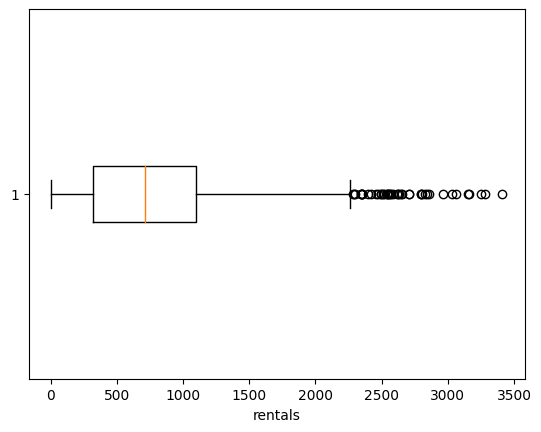

In [7]:
#data visualisation for trcing outliers
import matplotlib.pyplot as plt
label=bike_data['rentals']
plt.boxplot(label,vert=False)
plt.xlabel('rentals')
plt.show()

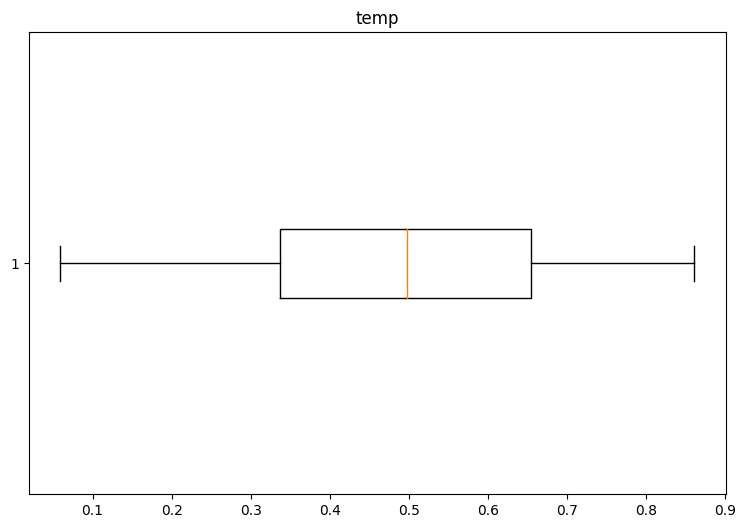

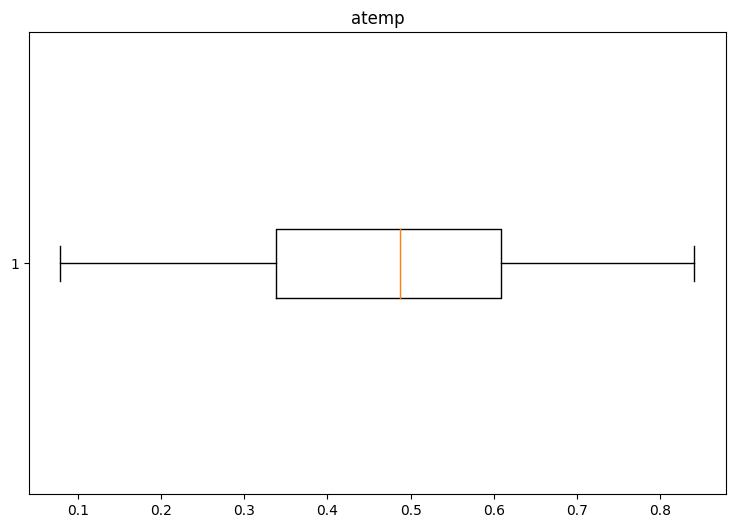

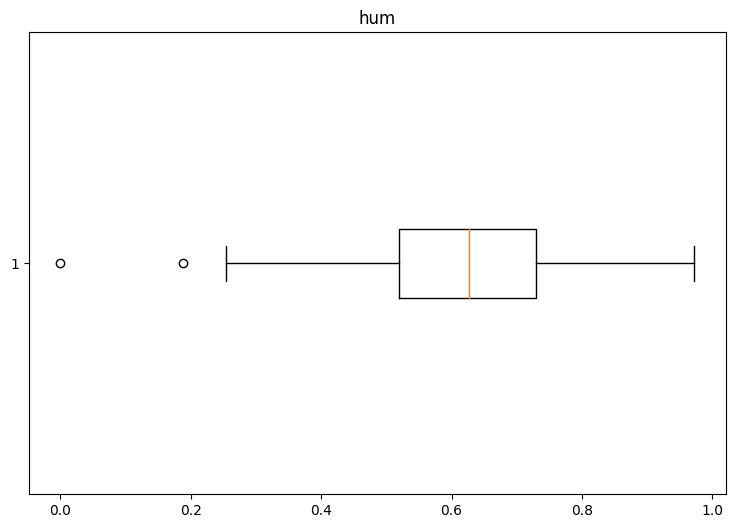

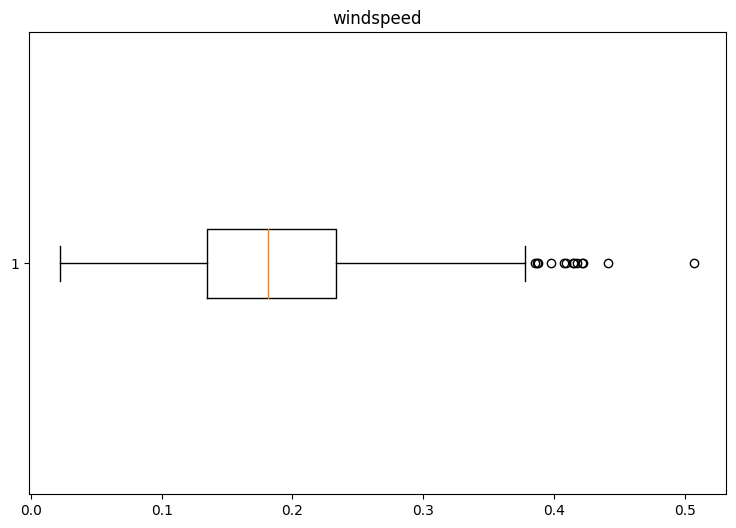

In [11]:
#locating outliers in each numerical feature
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_data[col]
    ax.boxplot(feature,vert=False)

    ax.set_title(col)
plt.show()

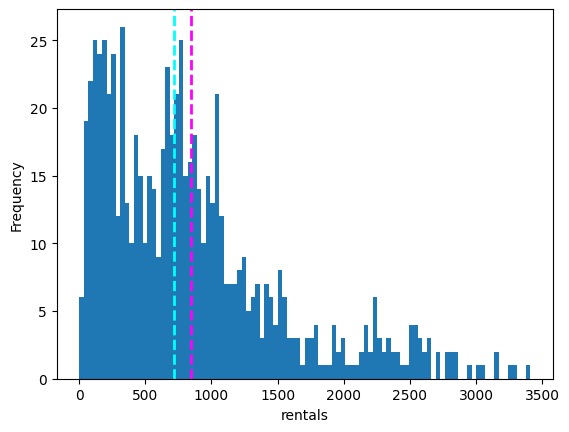

In [14]:
#checking normalisation of data 
plt.hist(label,bins=100)
plt.axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)
plt.xlabel('rentals')
plt.ylabel('Frequency')
plt.show()

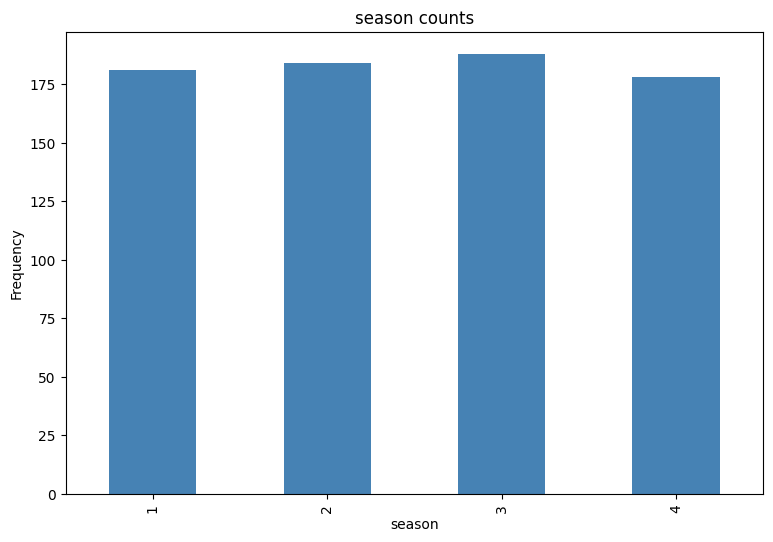

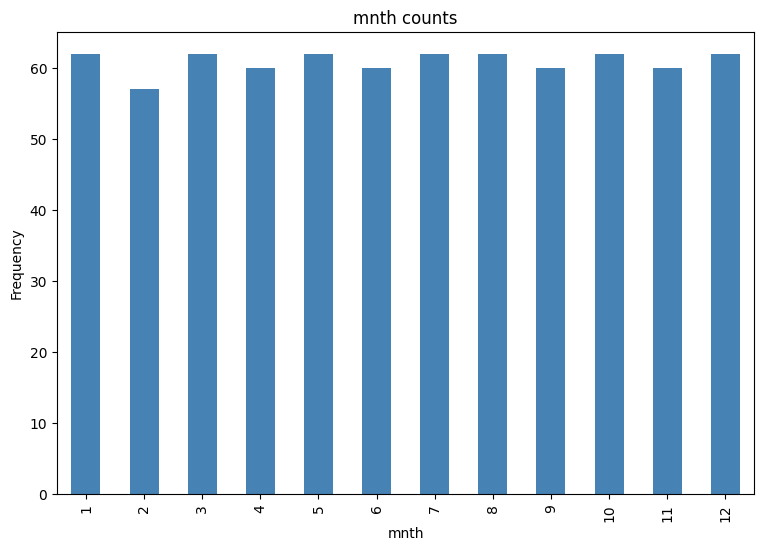

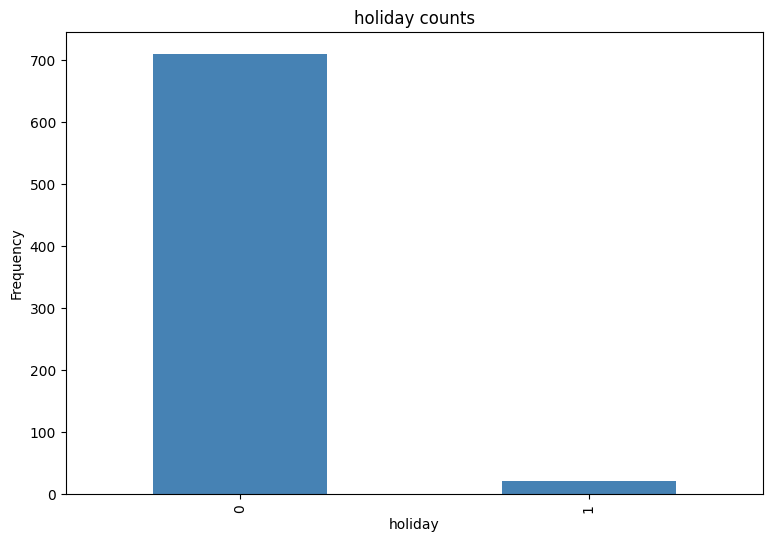

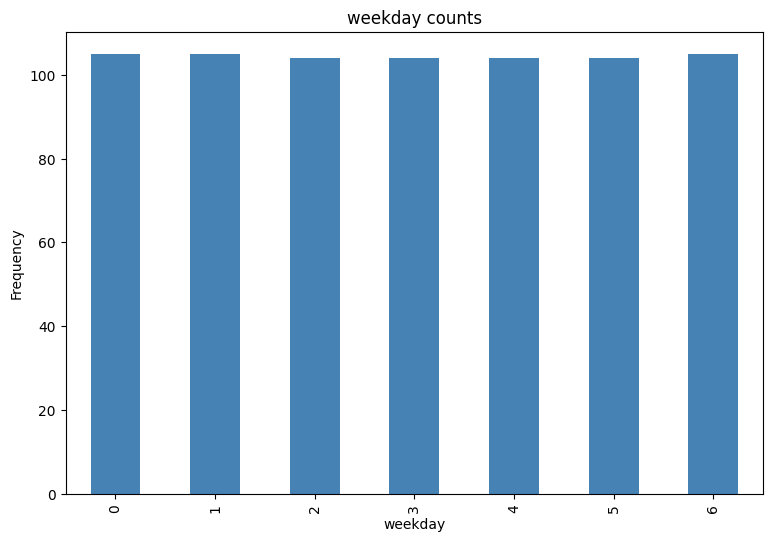

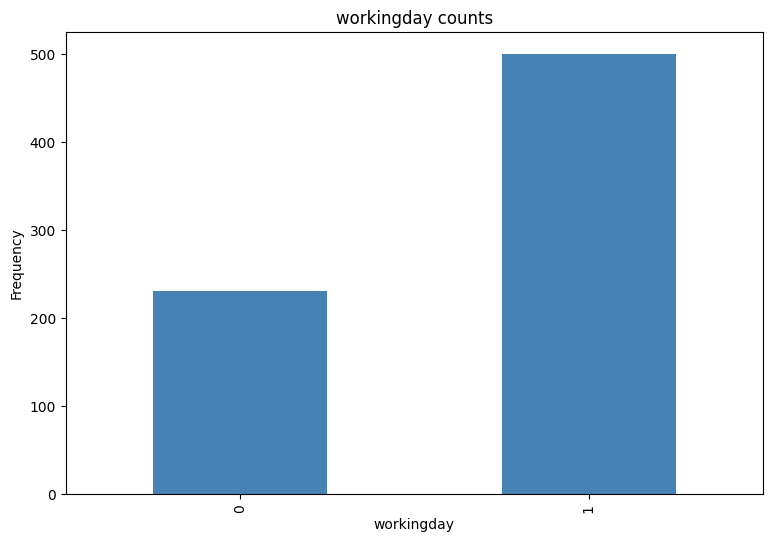

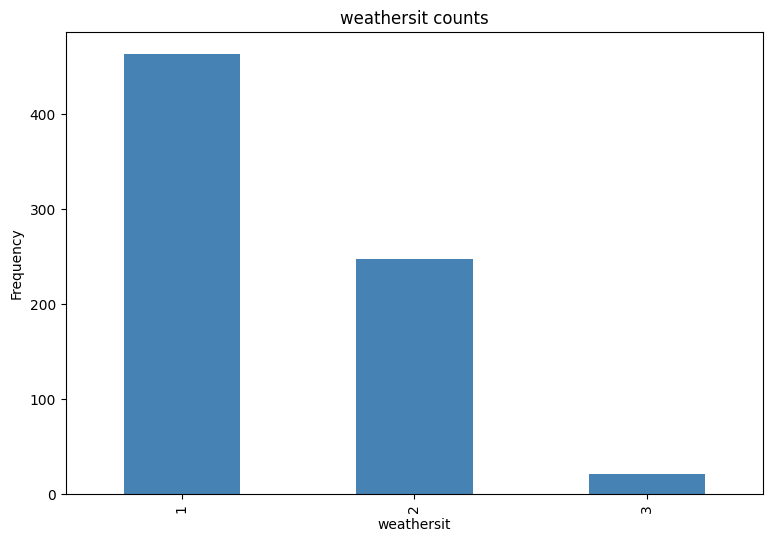

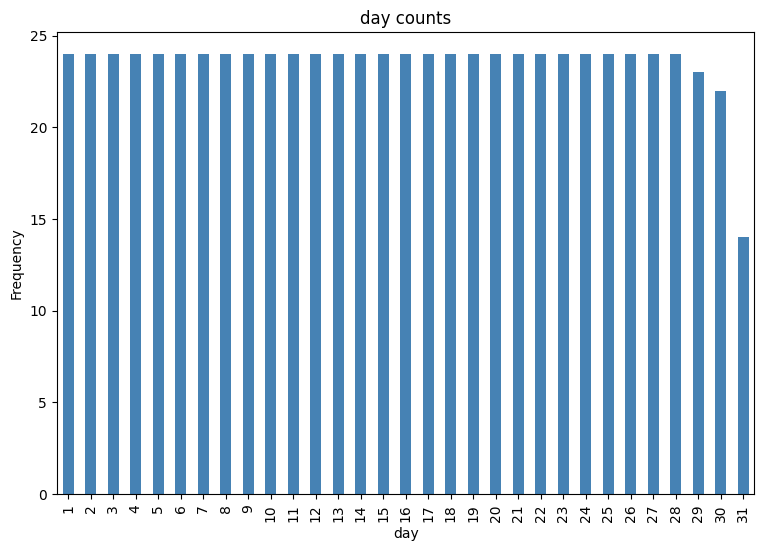

In [15]:
# plot a bar plot for each categorical feature count
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']

for col in categorical_features:
    counts = bike_data[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()


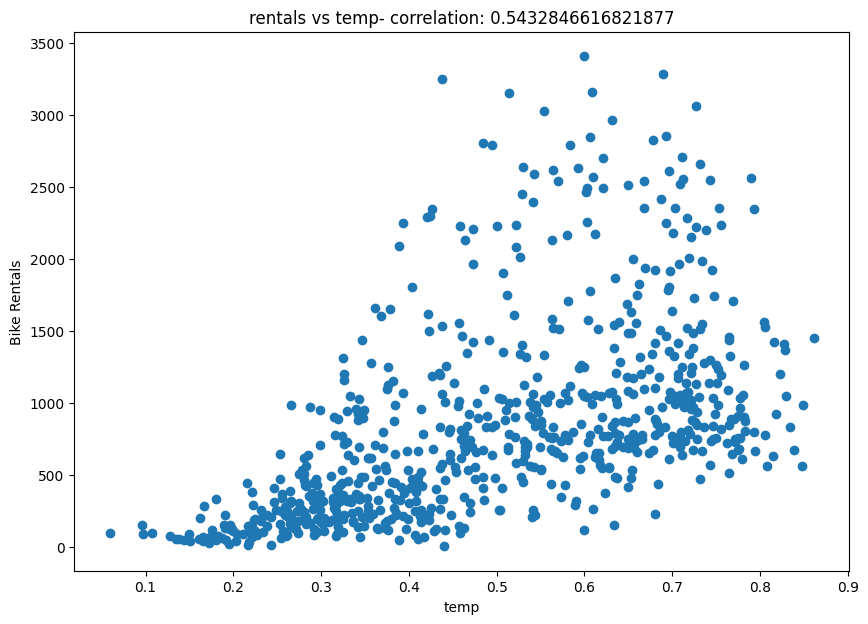

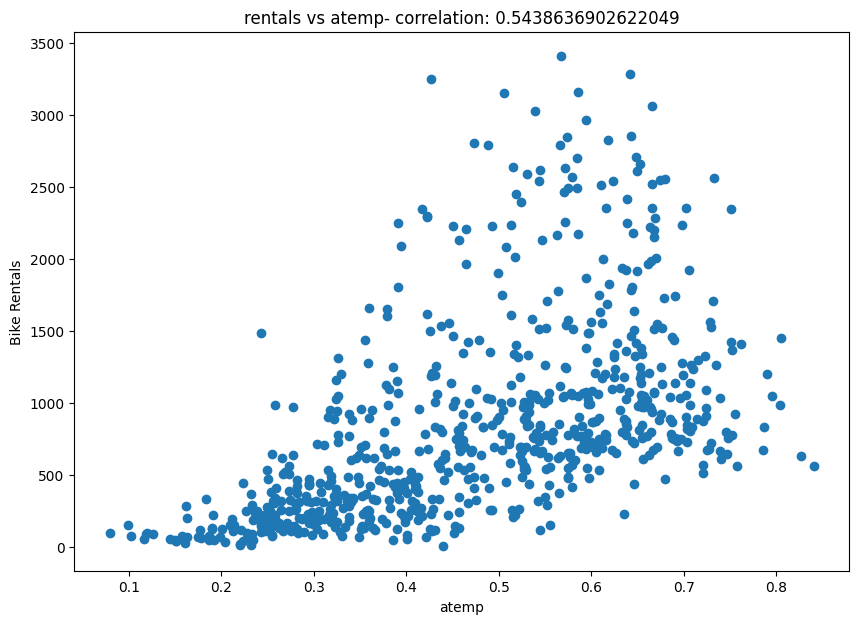

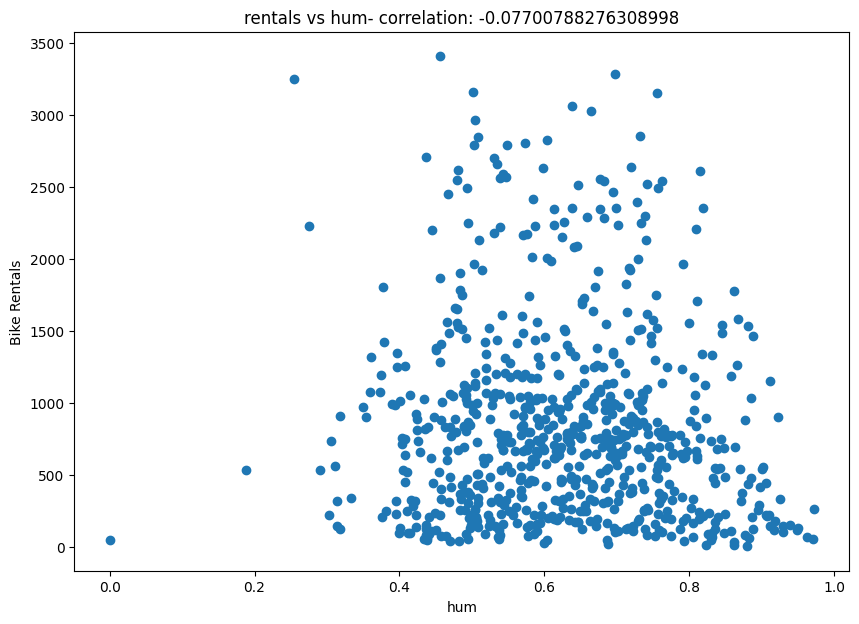

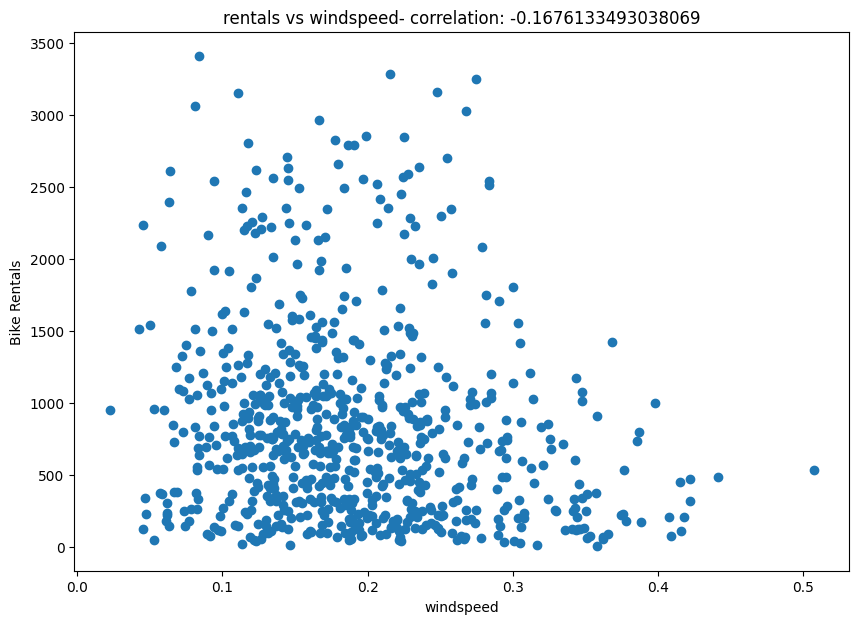

In [16]:
#ploting correlation graph along with the correlation value
for i in numeric_features:
  fig=plt.figure(figsize=(10,7))
  ax=fig.gca()
  feature=bike_data[i]
  label=bike_data['rentals']
  correlation=feature.corr(label)
  plt.scatter(x=feature, y=label)
  plt.xlabel(i)
  plt.ylabel('Bike Rentals')
  ax.set_title('rentals vs ' + i + '- correlation: ' + str(correlation))
plt.show()

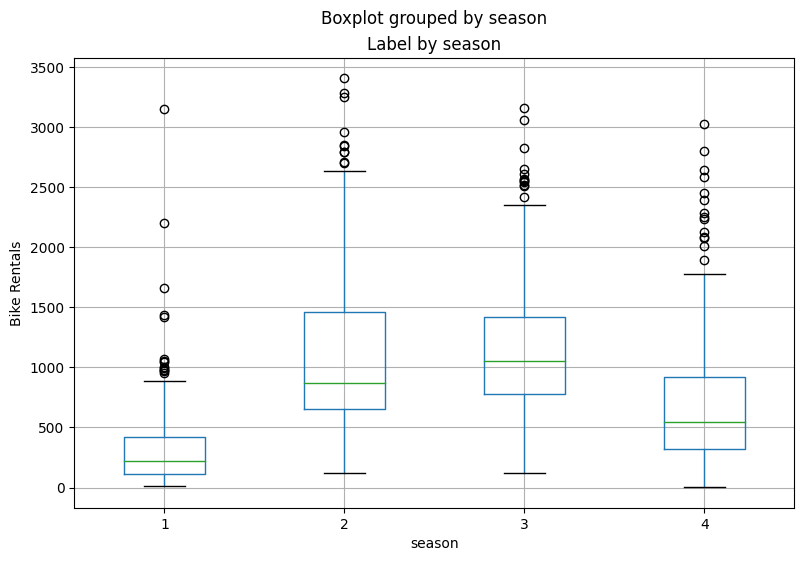

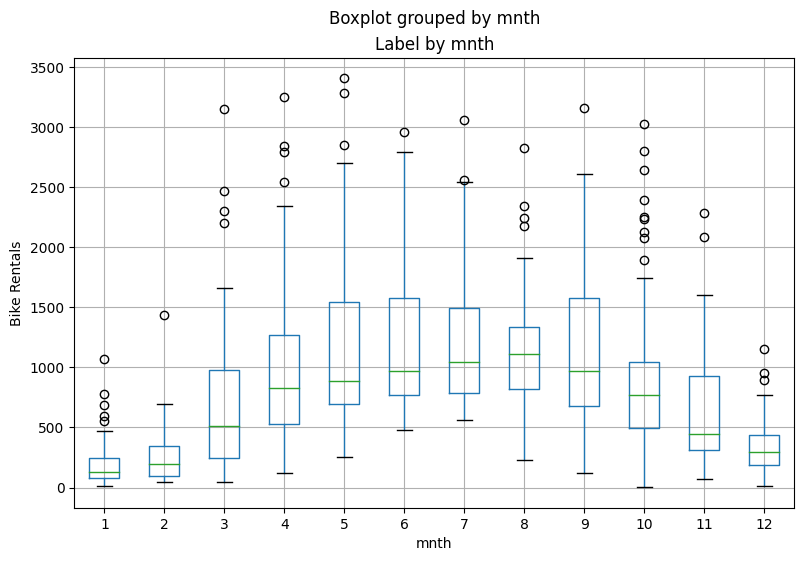

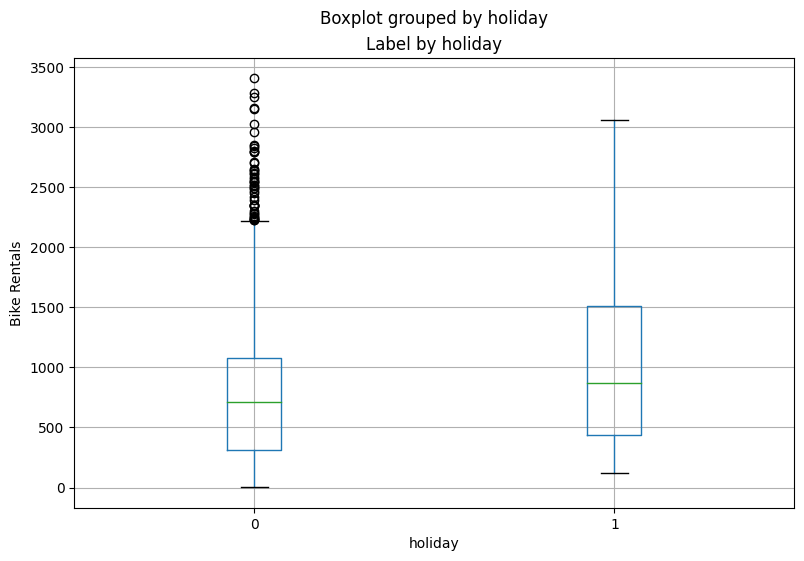

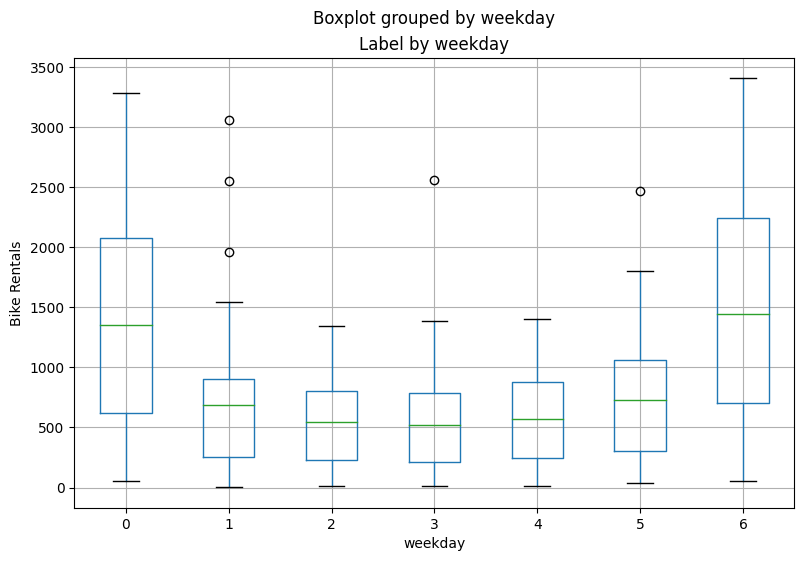

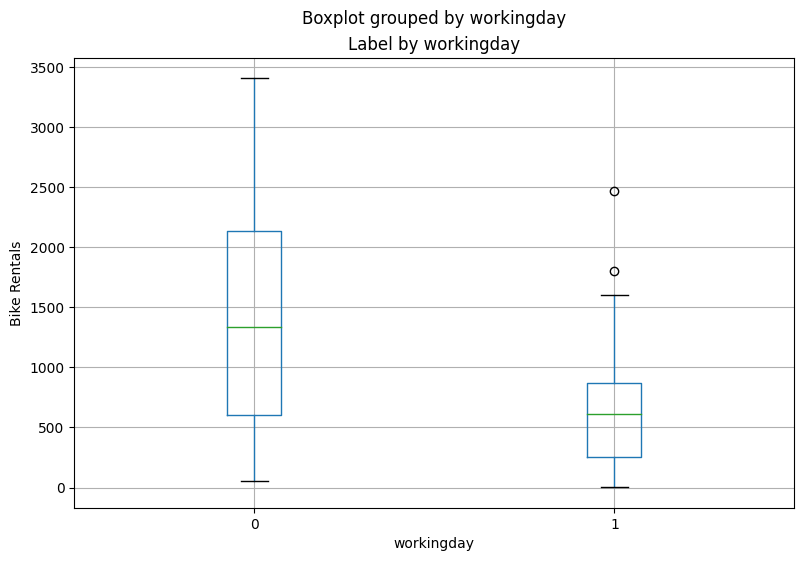

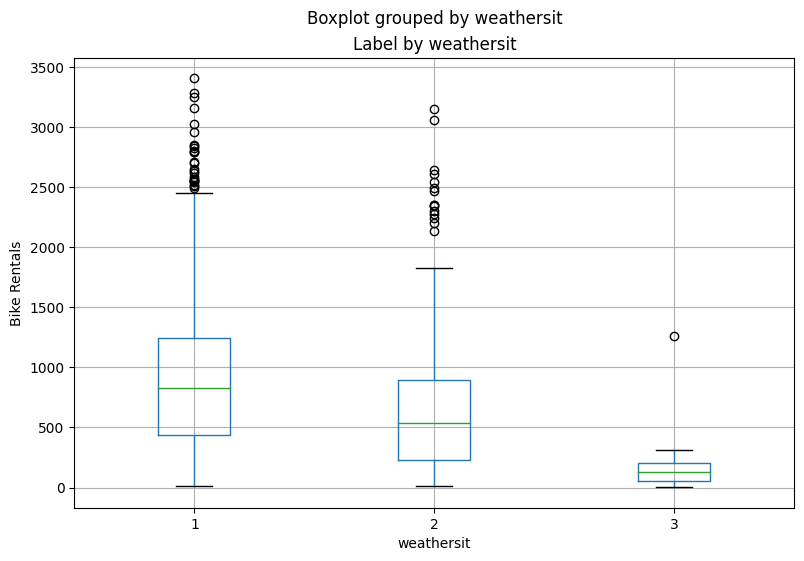

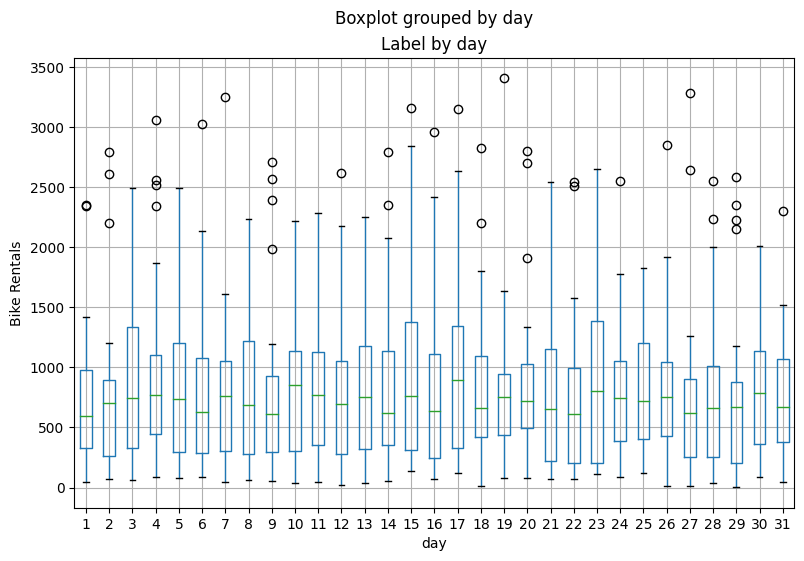

In [17]:
# plot a boxplot for the label by each categorical feature
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    bike_data.boxplot(column = 'rentals', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Bike Rentals")
plt.show()

In [31]:
#separate feature and labels
X,y=bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values,bike_data['rentals'].values

In [35]:
#splting data in train and test set, 80:20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train.shape)

(584, 10)


In [33]:
#creating model 
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [36]:
#fiting training sets in model
model=model.fit(X_train,y_train)
print(model)

LinearRegression()


In [40]:
#predicting 
predicitions=model.predict(X_test)
predicitions

array([ 5.55945951e+02,  8.54296638e+00,  2.66951537e+02,  1.12372057e+03,
        7.90329092e+02,  1.12653684e+03, -1.90669485e+02,  2.06366258e+02,
        1.24774769e+03,  9.38852103e+02,  6.80381171e+02,  3.19481313e+02,
        8.30241562e+02,  3.08434539e+02,  3.28879491e+02,  1.08251330e+03,
        3.10159524e+02,  1.05823178e+03,  1.37224535e+03,  4.83812098e+02,
        1.14313997e+03,  1.53704674e+03,  4.70080217e+02, -5.88331268e+01,
        1.80854280e+00,  9.73578297e+02,  5.81344186e+01,  8.03559008e+02,
        1.81747499e+02,  4.19365437e+02,  1.05865311e+03,  6.63497976e+02,
        7.83721999e+02,  9.26543097e+02,  5.71403656e+02,  1.32723901e+03,
        1.11420650e+03,  1.70646150e+03,  2.48130158e+02, -1.77728842e+02,
        8.05436822e+02,  1.54441360e+02,  1.11556366e+03,  1.60569291e+03,
        1.11194499e+03, -9.04851146e+00,  1.08986443e+03,  5.47908215e+02,
        1.53725919e+03,  1.00712426e+03,  1.25691683e+03,  9.30820818e+02,
        1.07418766e+03,  

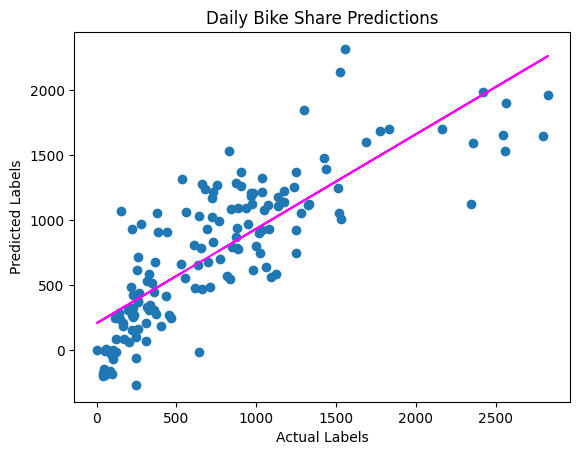

In [43]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

plt.scatter(y_test, predicitions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predicitions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [45]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predicitions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predicitions)
print("R2:", r2)

MSE: 134776.82919221793
RMSE: 367.1196387994218
R2: 0.6540666338476719
